# 🧵 Color Trend Analysis

This notebook analyzes sales data to uncover color and product type trends. 

**Note:** This version uses sample sales data `sales_data_sample.csv`. To use real data, replace file with `sales_data.csv` and update code accordingly. 

In [144]:
# import pandas for data handling 
import pandas as pd 

# load csv file into a pandas DataFrame, parsing "Date" column as datetime 
df = pd.read_csv("sales_data_sample.csv", parse_dates=["Date"]) 

# display first 5 rows to check data loaded correctly 
df.head() 

,Date,Product Type,Color,Quantity Sold,Season
0,2023-01-15,jersey alg 30/1,Navy Blue,120,Winter
1,2023-02-10,bb rib 30/1,Soft Pink,95,Winter
2,2023-03-12,jersey alg 24/1,Lime Green,40,Spring
3,2023-04-20,rib liso 24/1,White,60,Spring
4,2023-05-18,frisa inv. 30/70/12,Coral Red,100,Summer


In [145]:
# check for missing values in the DataFrame 
print("\nMissing values per column:\n", df.isnull().sum())

# display unique values in important columns 
print("\nUnique Colors:", df["Color"].unique())
print("\nUnique Product Types:", df["Product Type"].unique())
print("\nUnique Seasons:", df["Season"].unique())


Missing values per column:
 Date             0
Product Type     0
Color            0
Quantity Sold    0
Season           0
dtype: int64

Unique Colors: ['Navy Blue' 'Soft Pink' 'Lime Green' 'White' 'Coral Red' 'Beige' 'Black']

Unique Product Types: ['jersey alg 30/1' 'bb rib 30/1' 'jersey alg 24/1' 'rib liso 24/1'
 'frisa inv. 30/70/12' 'puño 2*1 alg 24/70' 'frisa inv. 24/70/10'
 'bb rib alg poli 30/20' 'bb rib alg poli 36/20']

Unique Seasons: ['Winter' 'Spring' 'Summer' 'Fall']


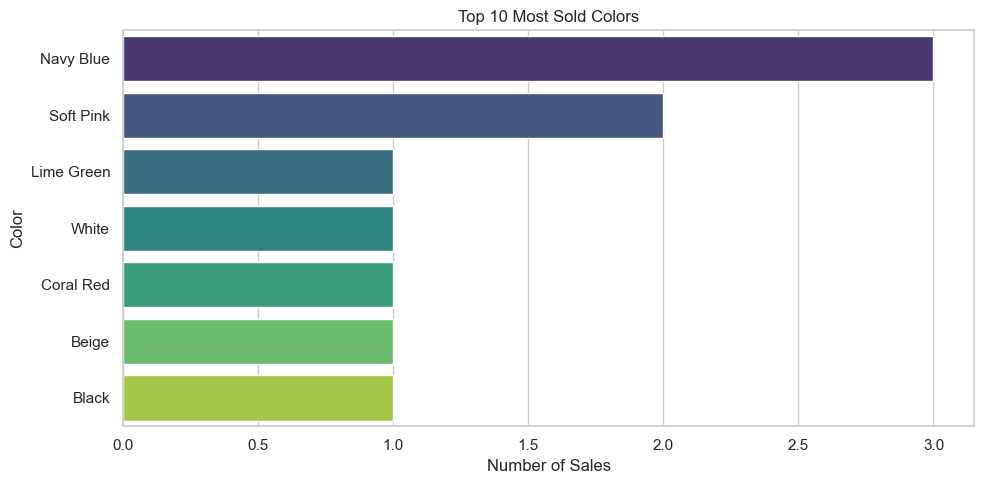

In [146]:
# import plotting libraries 
import matplotlib.pyplot as plt 
import seaborn as sns

# set seaborn style
sns.set(style="whitegrid") 

# count sales frequency per color 
color_counts = df["Color"].value_counts() 

# Plot top 10 colors by sales frequency 
plt.figure(figsize=(10, 5)) 
sns.barplot(
    y=color_counts.index[:10],
    x=color_counts.values[:10],
    hue=color_counts.index[:10],   # assign hue
    palette="viridis",
    dodge=False,                   # avoids double bars
    legend=False                   # hide repeated legend
)
plt.title("Top 10 Most Sold Colors")
plt.xlabel("Number of Sales")
plt.ylabel("Color") 
plt.tight_layout()
plt.show() 

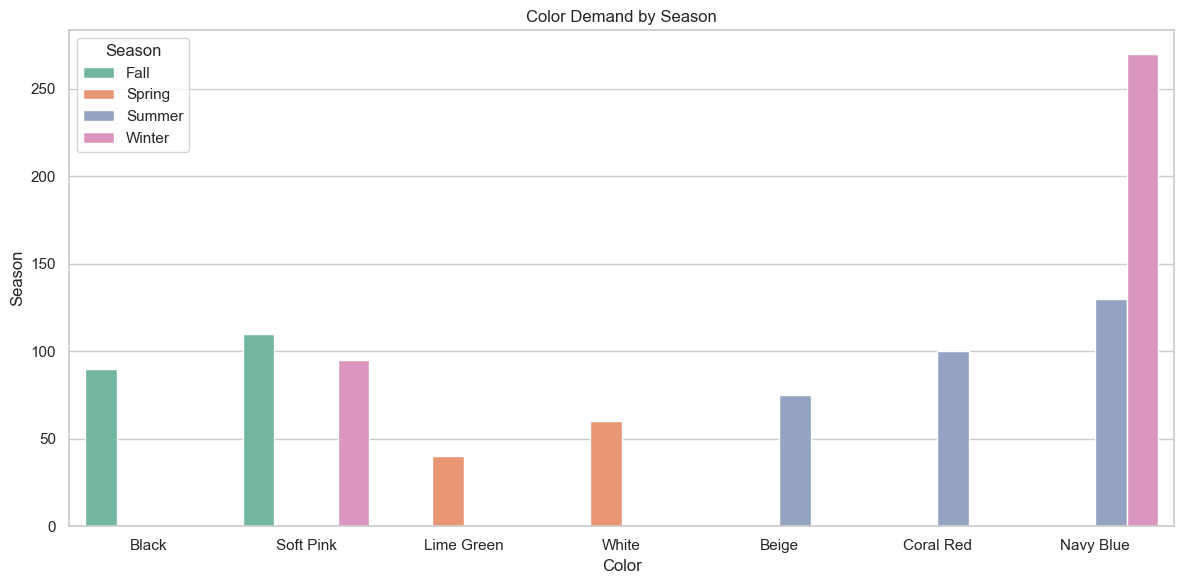

In [147]:
# group data by season and color, sum quantities sold 
season_color = df.groupby(["Season", "Color"])["Quantity Sold"].sum().reset_index() 

# plot grouped bar chart for color demand by season 
plt.figure(figsize=(12,6))
sns.barplot(
    x="Color", 
    y="Quantity Sold", 
    hue="Season", 
    data=season_color, 
    palette="Set2"
)
plt.title("Color Demand by Season") 
plt.xlabel("Color")
plt.ylabel("Season") 
plt.tight_layout() 
plt.show() 

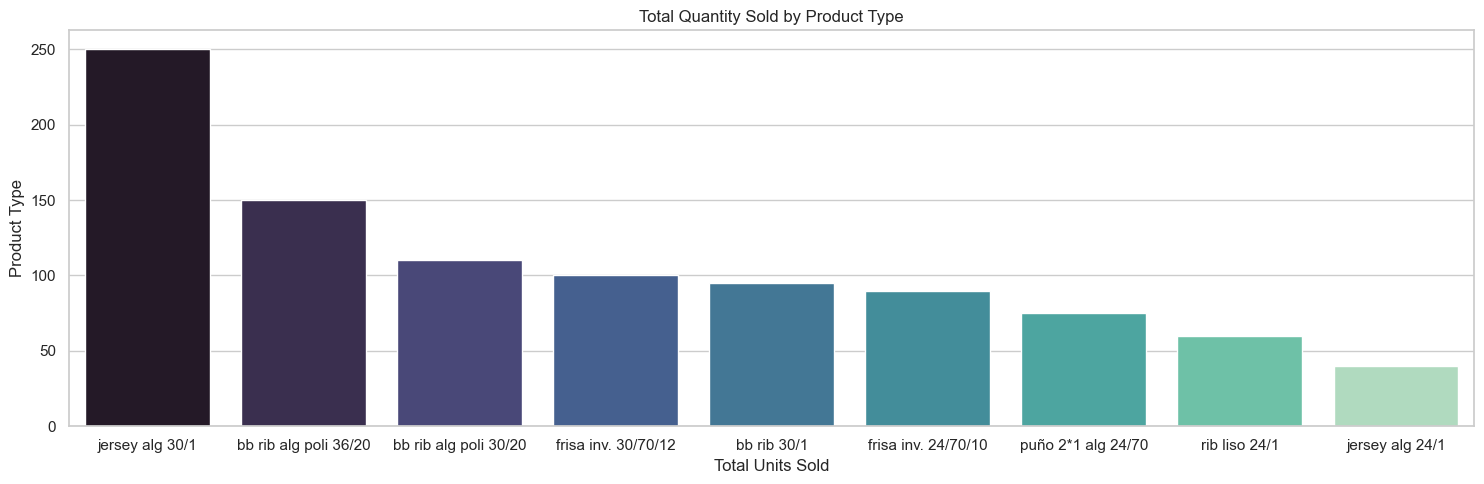

In [148]:
# analyize sales trend by product type 
product_sales = df.groupby("Product Type")["Quantity Sold"].sum().sort_values(ascending=False)

# plot horizontal bar chart of product sales 
plt.figure(figsize=(15, 5))
sns.barplot(
    y=product_sales.values, 
    x=product_sales.index, 
    palette="mako",
    hue=product_sales.index,  # assign hue
)
plt.title("Total Quantity Sold by Product Type")
plt.xlabel("Total Units Sold")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show() 

In [149]:
# Prepare Data (Encoding Categorical Variables) 

# import LabelEncoder from sklearn to convert text label to numerical values 
# Machine Learning models require numerical input... 
from sklearn.preprocessing import LabelEncoder 

# create copy of original DataFrame to avoid modifying it 
df_encoded = df.copy() 

# create separate label encoders for each categorical column 
le_color = LabelEncoder() 
le_product = LabelEncoder() 
le_season = LabelEncoder() 

# apply encoding to each categorical column 
df_encoded["Color"] = le_color.fit_transform(df_encoded["Color"])
df_encoded["Product Type"] = le_product.fit_transform(df_encoded["Product Type"]) 
df_encoded["Season"] = le_season.fit_transform(df_encoded["Season"]) 

# view first 5 rows of encoded DataFrame 
df_encoded.head() 

,Date,Product Type,Color,Quantity Sold,Season
0,2023-01-15,6,4,120,3
1,2023-02-10,0,5,95,3
2,2023-03-12,5,3,40,1
3,2023-04-20,8,6,60,1
4,2023-05-18,4,2,100,2


In [150]:
# Split data for training and testing 

# import train_test_split from sklearn to split data into training and testing sets
# purpose: train the model on one set and test it to see how well it performs 
from sklearn.model_selection import train_test_split 

# define input features (X) and target variable (y) 
# X: input data: what model uses to make predictions 
# y: target data: what model tries to predict -> quantity sold 
X = df_encoded[["Color", "Product Type", "Season"]]
y = df_encoded["Quantity Sold"] 

# split data into training and testing sets (80% train, 20% test)
# 80/20 split is popular to train model and learn patters, as it's enough data to test and get reliable performance metrics and it's simple to understand and consistent across different datasets
# test_size=0.2 means 20% of data will be used for testing
# random_state=42 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

# check if split worked correctly 
# for 10 rows of CSV 
print("Training set size:", len(X_train)) # 8
print("Test set size:", len(X_test)) # 2 

Training set size: 8
Test set size: 2


In [152]:
# Train a Prediction Model (Improved with Random Forest)

# import model and evaluation metrics
# better than a single decision tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # model evaluation tools
import numpy as np  # for math operations

# create and train the model
# multiple trees = better generalization
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)  # train the model on training data

# make predictions on test set
y_pred = model.predict(X_test)  # predict quantity sold for test data

# evaluate prediction accuracy
r2 = r2_score(y_test, y_pred)
# safe for all sklearn versions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# inspect prediction vs actual values
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

comparison_df

R² Score: -16.936444444444437
RMSE: 31.763579773067132


,Actual,Predicted
0,110,99.6
1,95,138.7


In [ ]:
# Make Custom Prediction 

# define sample input values for prediction
sample_color = "Soft Pink"
sample_product = "bb rib 30/1"
sample_season = "Fall" 

# transform input values using label encoders 
color_encoded = le_color.transform([sample_color])[0]
product_encoded = le_product.transform([sample_product])[0]
season_encoded = le_season.transform([sample_season])[0] 

# format values into a list of features for prediction 
sample_input = [[color_encoded, product_encoded, season_encoded]]

# predict quantity sold for given input 
predicted_quantity = model.predict(sample_input)

# show results 
print(f"Predicted Quantity Sold for {sample_color}, {sample_product} in {sample_season}: {int(predicted_quantity[0])}")